In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population = 31522290
infected_population = 3605456
recovered_population = 33698
susceptible_population = population - infected_population - recovered_population

In [3]:
death_rate = 7.284
birth_rate = 29.2
gama = 0.9
beta = 0.1
malaria_infection_rate = 161.5
days = np.arange(0, 365, 1)

In [14]:
#differential model equations to calculate the number of infected, recovered, and susceptible people
def model_differential(y, timestamp, beta, gamma, birthrate, deathrate, malaria_rate):
    S = y[0]
    I = y[1]
    R = y[2]
    return[
        (-beta*S*I/population) + (birthrate*S/population) - (deathrate*S/population),
        (beta*S*I/population) - (gamma*I/population) - (deathrate*I/population) - (malaria_rate*I/population),
        (gamma*I) - (deathrate*R)
    ]

In [15]:
#model fitting function to calculate the number of infected, recovered, and susceptible people
from scipy.integrate import odeint
model_fit = odeint(model_differential, y0=[susceptible_population, infected_population, recovered_population], t=days, args=(beta, gama, birth_rate, death_rate, malaria_infection_rate))
S = model_fit.T[0]
I = model_fit.T[1]
R = model_fit.T[2]

/var/folders/gq/97zx0zks7h1cnkg15mbbbp0m0000gn/T/ipykernel_6123/3781542676.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='k', ls='-')


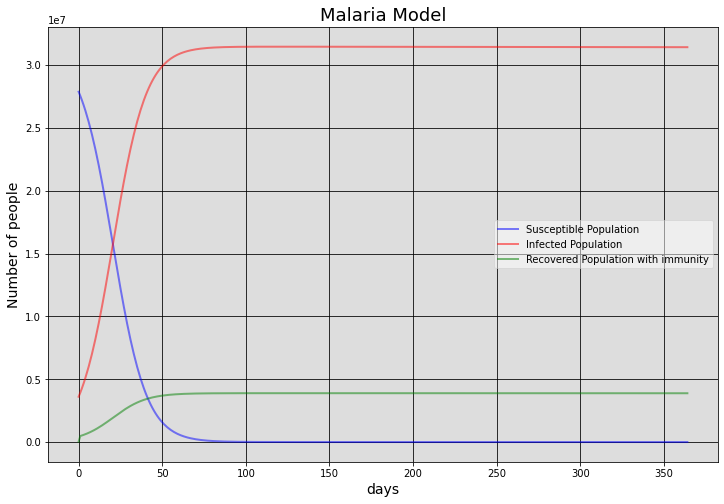

In [17]:
fig = plt.figure(facecolor='w', figsize = (12,8))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(days, S, 'b', alpha=0.5, lw=2, label='Susceptible Population')
ax.plot(days, I, 'r', alpha=0.5, lw=2, label='Infected Population')
ax.plot(days, R, 'g', alpha=0.5, lw=2, label='Recovered Population with immunity')
ax.set_xlabel('days', fontsize=14)
ax.set_ylabel('Number of people', fontsize=14)
plt.title('Malaria Model', fontsize=18)
ax.grid(b=True, which='major', c='k', ls='-')
legend = ax.legend(loc='best')
legend.get_frame().set_alpha(0.5)
plt.savefig('model.jpg', bbox_inches = 'tight')